<a href="https://colab.research.google.com/github/danhbui88/Neural-Networks-and-Deep-Learning-McGill-University/blob/master/Predicting_if_client_makes_a_decision_to_buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (5).csv
Saving train.csv to train (5).csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 19 columns):
ID                         10480 non-null int64
Administrative             10480 non-null int64
Administrative_Duration    10480 non-null float64
Informational              10480 non-null int64
Informational_Duration     10480 non-null float64
ProductRelated             10480 non-null int64
ProductRelated_Duration    10480 non-null float64
BounceRates                10480 non-null float64
ExitRates                  10480 non-null float64
PageValues                 10480 non-null float64
SpecialDay                 10480 non-null float64
Month                      10480 non-null object
OperatingSystems           10480 non-null int64
Browser                    10480 non-null int64
Region                     10480 non-null int64
TrafficType                10480 non-null int64
VisitorType                10480 non-null object
Weekend                    10480 non-null bool
Revenue     

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 18 columns):
ID                         1850 non-null int64
Administrative             1850 non-null int64
Administrative_Duration    1850 non-null float64
Informational              1850 non-null int64
Informational_Duration     1850 non-null float64
ProductRelated             1850 non-null int64
ProductRelated_Duration    1850 non-null float64
BounceRates                1850 non-null float64
ExitRates                  1850 non-null float64
PageValues                 1850 non-null float64
SpecialDay                 1850 non-null float64
Month                      1850 non-null object
OperatingSystems           1850 non-null int64
Browser                    1850 non-null int64
Region                     1850 non-null int64
TrafficType                1850 non-null int64
VisitorType                1850 non-null object
Weekend                    1850 non-null bool
dtypes: bool(1), float64(7), int

In [6]:
train.columns.values

array(['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype=object)

In [0]:
train1=train.drop(['ID'],axis=1)
test1=test.drop(['ID'],axis=1)



In [0]:
#Convert categorical Month, VisitorType, Weekend, Revenue to numerical
train1=pd.get_dummies(train1,columns=['Month','VisitorType'])
test1=pd.get_dummies(test1,columns=['Month','VisitorType'])

In [9]:
#Convert Revenue to Categorical then drop the old column Revenue
train1['Revenue_cat']=train1.Revenue.astype('category')
cat_col=train1.select_dtypes(['category']).columns
cat_col
train1[cat_col]=train1[cat_col].apply(lambda x: x.cat.codes)
train1.head(5)
train1=train1.drop(['Revenue'],axis=1)

train1.shape
train1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_cat
0,1,85.0,0,0.0,14,306.500000,0.000000,0.004444,0.0,0.0,2,2,3,2,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,68,3357.340476,0.018137,0.028272,0.0,1.0,3,2,6,2,True,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0.0,0,0.0,6,56.500000,0.066667,0.116667,0.0,0.0,2,6,1,3,True,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0.0,0,0.0,28,2524.000000,0.008929,0.051786,0.0,0.0,2,2,1,3,True,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,2,6,2,False,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
#Convert Weekend to categorical then drop the old column Weekend
train1['Weekend_cat']=train1.Weekend.astype('category')
cat_col=train1.select_dtypes(['category']).columns
cat_col
train1[cat_col]=train1[cat_col].apply(lambda x: x.cat.codes)
train1.head(5)
train1=train1.drop(['Weekend'],axis=1)

In [0]:
test1['Weekend_cat']=test1.Weekend.astype('category')
cat_col=test1.select_dtypes(['category']).columns
cat_col
test1[cat_col]=test1[cat_col].apply(lambda x: x.cat.codes)
test1.head(5)
test1=test1.drop(['Weekend'],axis=1)

In [12]:
train1.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_cat,Weekend_cat
0,1,85.0,0,0.0,14,306.500000,0.000000,0.004444,0.0,0.0,2,2,3,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,68,3357.340476,0.018137,0.028272,0.0,1.0,3,2,6,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,0.0,0,0.0,6,56.500000,0.066667,0.116667,0.0,0.0,2,6,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,0,0.0,0,0.0,28,2524.000000,0.008929,0.051786,0.0,0.0,2,2,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,2,6,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [13]:
test1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_cat
0,1,13.000000,4,37.5,32,675.666667,0.005714,0.028571,0.000000,0.0,2,4,1,10,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,7,150.375000,0,0.0,7,219.583333,0.000000,0.018182,0.000000,0.0,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0.000000,0,0.0,51,742.960317,0.003922,0.012121,0.000000,0.0,1,1,3,2,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0,0.000000,0,0.0,6,90.166667,0.033333,0.066667,0.000000,0.0,3,2,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,3,2,5,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [14]:
train1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_cat,Weekend_cat
count,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000
mean,2.305630,80.748367,0.504962,34.425406,31.534733,1182.997029,0.022278,0.043050,5.960347,0.060611,2.127576,2.354485,3.149427,4.071565,0.034733,0.138931,0.014313,0.035019,0.023378,0.155248,0.273855,0.243798,0.043511,0.037214,0.137786,0.006679,0.855534,0.155821,0.234160
std,3.303263,178.072972,1.275928,139.403173,44.003213,1905.261792,0.048586,0.048650,19.016011,0.197508,0.906679,1.701509,2.411483,4.041633,0.183111,0.345891,0.118783,0.183837,0.151108,0.362158,0.445957,0.429393,0.204015,0.189294,0.344692,0.081458,0.351578,0.362702,0.423493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.566071,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,596.541667,0.003125,0.025191,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,92.262500,0.000000,0.000000,38.000000,1463.850000,0.016845,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#to dataframe
train1=pd.DataFrame(train1)

In [16]:
train1.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_cat,Weekend_cat
0,1,85.000000,0,0.000000,14,306.500000,0.000000,0.004444,0.000000,0.0,2,2,3,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0.000000,0,0.000000,68,3357.340476,0.018137,0.028272,0.000000,1.0,3,2,6,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,0.000000,0,0.000000,6,56.500000,0.066667,0.116667,0.000000,0.0,2,6,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,0,0.000000,0,0.000000,28,2524.000000,0.008929,0.051786,0.000000,0.0,2,2,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,2,2,6,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,2,182.400000,0,0.000000,27,1165.944762,0.000000,0.007407,0.000000,0.0,2,4,6,11,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
6,0,0.000000,0,0.000000,10,172.500000,0.010000,0.043333,0.000000,0.0,2,2,3,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,2,42.750000,0,0.000000,31,2526.483333,0.027273,0.055556,40.184488,0.0,2,4,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,12,187.277778,3,88.583333,43,3266.127778,0.004242,0.043712,3.332333,0.0,1,1,1,10,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


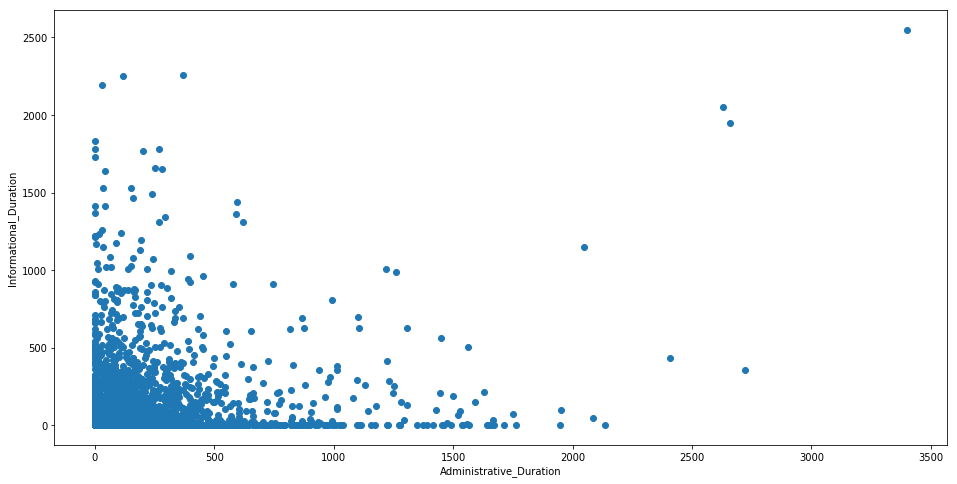

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train1['Administrative_Duration'], train1['Informational_Duration'])
ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('Informational_Duration')
plt.show()

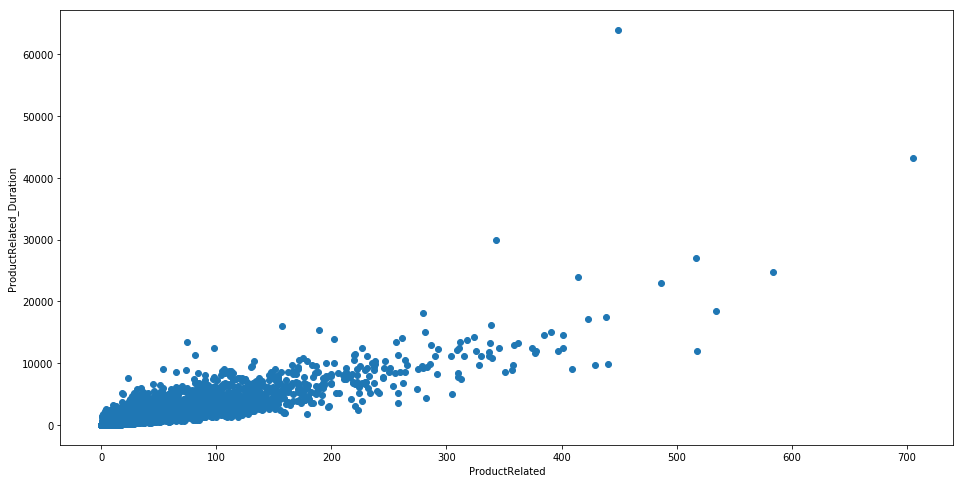

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train1['ProductRelated'], train1['ProductRelated_Duration'])
ax.set_xlabel('ProductRelated')
ax.set_ylabel('ProductRelated_Duration')
plt.show()

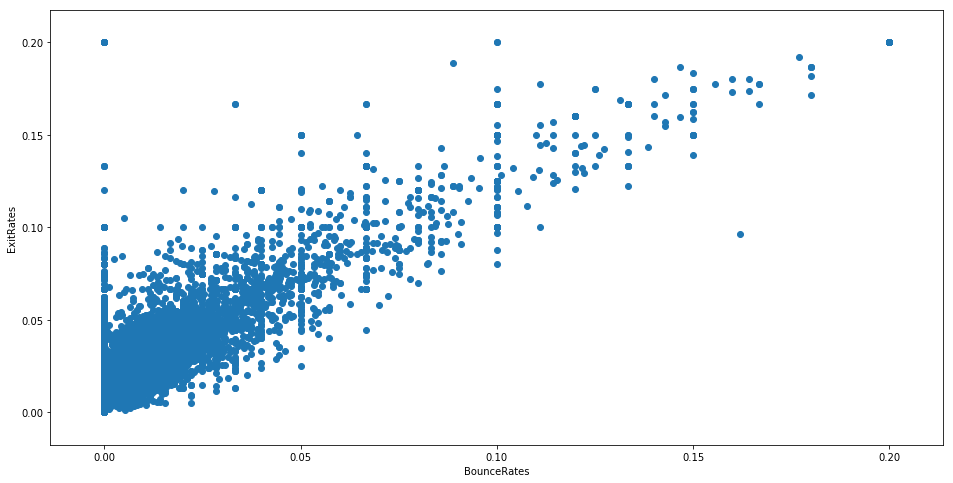

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train1['BounceRates'], train1['ExitRates'])
ax.set_xlabel('BounceRates')
ax.set_ylabel('ExitRates')
plt.show()

In [20]:
## Remove outliers after 75%
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train1))
print(z)


[[0.39527347 0.02387693 0.3957792  ... 0.41092595 0.42963047 0.55295234]
 [0.69801892 0.45347825 0.3957792  ... 0.41092595 0.42963047 1.80847412]
 [0.69801892 0.45347825 0.3957792  ... 0.41092595 0.42963047 1.80847412]
 ...
 [0.81570832 2.05263645 0.3957792  ... 2.43352846 0.42963047 0.55295234]
 [0.09252802 0.314034   0.38800123 ... 0.41092595 0.42963047 0.55295234]
 [0.09252802 0.38608693 0.3957792  ... 2.43352846 0.42963047 1.80847412]]


In [21]:
print(z.mean())
train1.columns
Q1 = train1.quantile(0.25)
Q3 = train1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


0.5855884541497824
Administrative                      4.000000
Administrative_Duration            92.262500
Informational                       0.000000
Informational_Duration              0.000000
ProductRelated                     31.000000
ProductRelated_Duration          1281.283929
BounceRates                         0.016845
ExitRates                           0.035714
PageValues                          0.000000
SpecialDay                          0.000000
OperatingSystems                    1.000000
Browser                             0.000000
Region                              3.000000
TrafficType                         2.000000
Month_Aug                           0.000000
Month_Dec                           0.000000
Month_Feb                           0.000000
Month_Jul                           0.000000
Month_June                          0.000000
Month_Mar                           0.000000
Month_May                           1.000000
Month_Nov                           

In [0]:
#print(train1 < (Q1 - 1.5 * IQR)) |(train1 > (Q3 + 1.5 * IQR))


In [22]:
###Remove outliers code
train1 = train1[(z < 5).all(axis=1)]
train1.shape

(8542, 29)

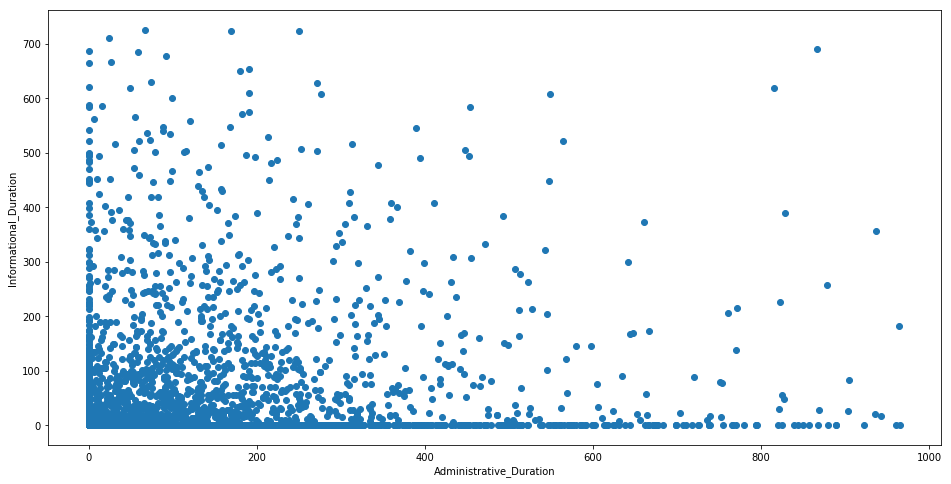

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train1['Administrative_Duration'], train1['Informational_Duration'])
ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('Informational_Duration')
plt.show()

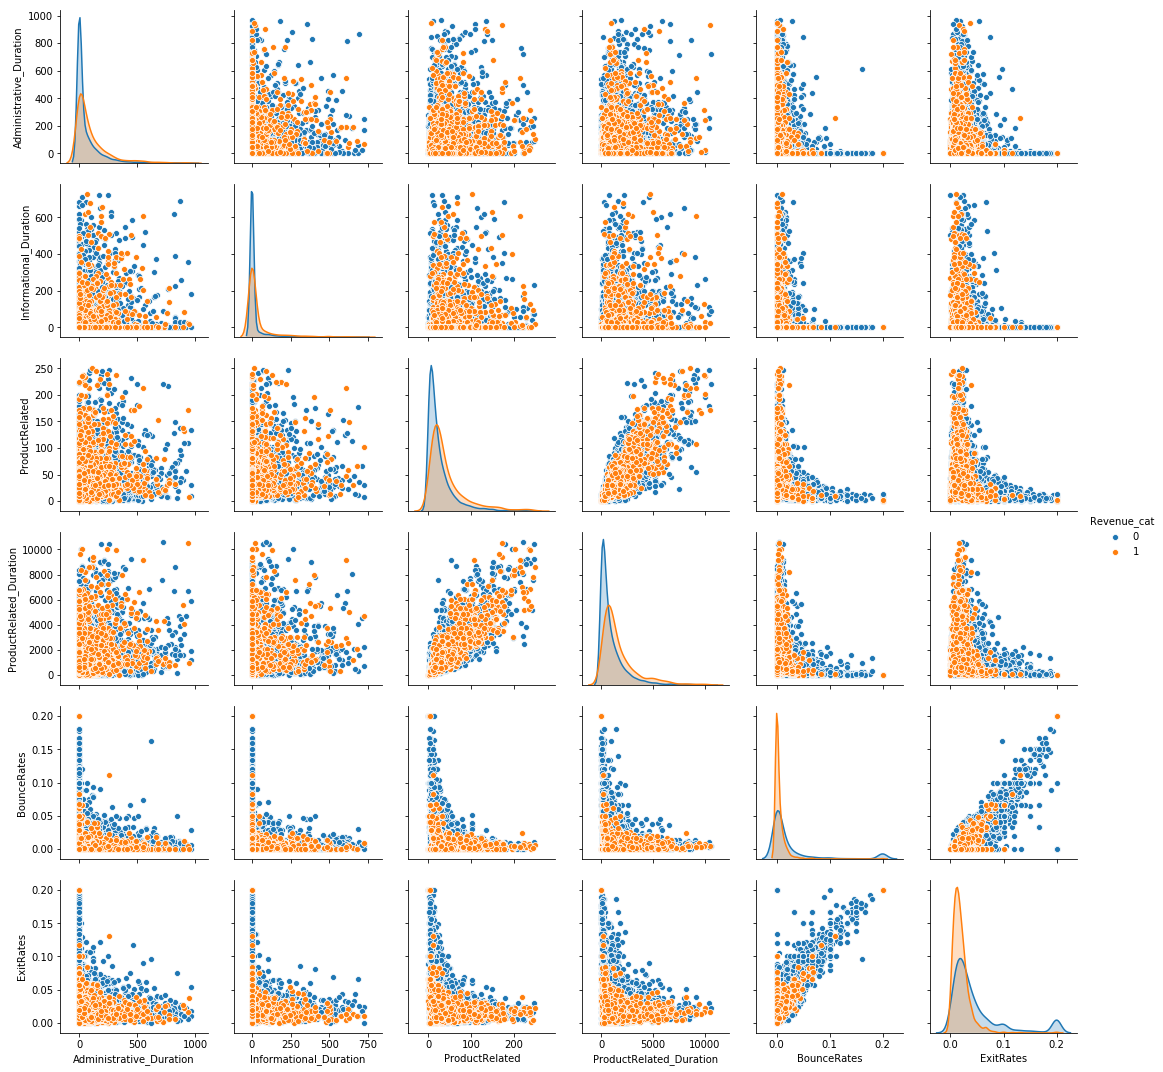

In [24]:
import seaborn as sns
sns.pairplot(train1,vars=['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates'],hue="Revenue_cat")

In [25]:
features=train1.drop(['Revenue_cat'],axis=1).values
labels=train1['Revenue_cat'].values
features.shape,labels.shape

((8542, 28), (8542,))

In [0]:
#split data to train and test (validation set)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [0]:
#from tensorflow.keras import layers
#from tensorflow import keras 
#import tensorflow as tf
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.layers.normalization import BatchNormalization
#from keras.layers.core import Dropout
#from keras import regularizers
#model = keras.Sequential()
#model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(28,)))
#model.add(keras.layers.BatchNormalization())
#model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(layers.Dropout(0.3))
#model.add(keras.layers.BatchNormalization())
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(30,activation='relu'))
#model.add(layers.Dense(40,activation='relu'))
#model.add(layers.Dense(1300,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(layers.Dropout(0.3))
#model.add(keras.layers.BatchNormalization())

#model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(keras.layers.BatchNormalization())

#model.add(layers.Dense(1,activation='sigmoid'))
#model.compile(keras.optimizers.Adam(lr=0.00001),loss='binary_crossentropy',metrics=['accuracy'])
#model.summary()
#early_stopping_monitor=EarlyStopping(monitor='val_acc', patience=100)
#h=model.fit(features,labels,epochs=500,batch_size=64,validation_split=0.3,callbacks=[early_stopping_monitor])

In [0]:
#Trying with Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 


In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_labels)


In [30]:
from sklearn.metrics import accuracy_score
#Predict the response for validation dataset
test_pred = clf.predict(test_features)
# Compute accuracy based on validation samples
acc_DT = accuracy_score(test_labels, test_pred)
print('Accuracy score',acc_DT)

Accuracy score 0.8673429574717129


In [0]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor

#rfr = RandomForestRegressor(bootstrap=True, random_state=1, n_jobs=-1)
#param_grid = dict(n_estimators=[100, 200, 300],
#                  max_depth=[1,2,5,10],
#                  min_samples_leaf=[8,10,12])

#grid = GridSearchCV(rfr, param_grid, cv=2, scoring='neg_mean_squared_error')
#grid.fit(train_features,train_labels)

#print("grid.cv_results_ {}".format(grid.cv_results_))


In [0]:
#print("-grid.best_score_ {}".format(-grid.best_score_))
#print("grid.best_params_ {}".format(grid.best_params_))
#print("grid.best_estimator_ {}".format(grid.best_estimator_)) 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,min_samples_leaf=12,n_estimators=100)
rf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
#Predict the response for validation dataset
test_pred1 = rf.predict(test_features)
# Compute accuracy based on validation samples
acc_RF = accuracy_score(test_labels, test_pred1)
print('Accuracy score',acc_RF)

Accuracy score 0.907530238002341


In [0]:
y_pred = rf.predict(test1)

In [0]:
y_pred=pd.DataFrame(data=y_pred,columns=['Revenue1'],index=range(10481,12331))

In [0]:
y_pred['Revenue'] = np.where(y_pred['Revenue1']==1, 'TRUE', 'FALSE')


In [0]:
y_pred=y_pred.drop(y_pred.columns[0],axis=1)

In [0]:
y_pred.index.rename('ID', inplace=True)

In [39]:
y_pred

,Revenue
ID,
10481,FALSE
10482,FALSE
10483,FALSE
10484,FALSE
10485,TRUE
10486,TRUE
10487,FALSE
10488,FALSE
10489,FALSE


In [0]:
y_pred.to_csv('csv_to_submit.csv')